## Homework 8

Carlos Lizama  
N17866309  

### Exercise 1
To show this result I will use the fact that a compact set is also sequentially compact, that means that every sequence has a convergence subsequence. However, if the set is infinite dimensional, then one can construct a sequence which has no convergence subsequence, and therefore the set is not compact.

In particular, consider the sequence $\{x_n\}_{n=1}^{\infty}$, where $x_n = e_n$, ie, it has a one in the $n$ dimension and zeros elsewhere. Clearly $\{ x_n\} \in \mathcal{P}(S) $. It is clear that for any two elements of this sequence $|| x_i - x_j || = 2$, and therefore there is no convergence subsequence. We thus conclude that the set $S$ is not compact. 

Therefore, if $\mathcal{P}(S)$ is compact as a subset of $(l_1(S,||\cdot||)$, then $S$ must be finite.


### Exercise 2
By contradiction, assume that such distribution exists. If $\psi^*$ is the stationary distribution, then it must satisfy $$ \psi^*(y) = \sum_{x \in \mathbb{Z}} p(x,y) \psi^*(x) \quad \forall y \in \mathbb{Z} $$

Now pick a $n \in \mathbb{Z}$ and using the fact that $p(x,y) = \mathbb{1} \{ x = y-1 \}$ we obtain

\begin{align*}
    \psi^*(n) & = \sum_{x \in \mathbb{Z}} p(x,n) \psi^*(x) \\
    & = p(n-1,n) \psi^*(n) \\
    & = \psi^*(n-1)
\end{align*}

But then we can do the same calculation for every $n \in \mathbb{Z}$, and hence we conclude $\psi^*(n) = \psi^*(n-1) = \bar{\psi} \quad \forall n \in \mathbb{Z} $.

But since $\mathbb{Z}$ is an infinite dimensional space, $\psi^*$ can not satisfy $$ \sum_{x \in \mathbb{Z}} \psi^*(n) = 1 $$

In fact,
$$ \sum_{x \in \mathbb{Z}} \psi^*(n) = \sum_{x \in \mathbb{Z}} \bar{\psi} = \infty > 1 $$

We conclude then that a stationary distribution can not exist.


### Exercise 3
First, note that the state space $X$ is finite. In fact, $X = \{ 0, 1, \ldots, Q \}$.

Then it is enough to show that the associated Markov operator $P$ is both aperiodic and irreductible. 

**Aperiodic:** $x$ is called *aperiodic* if $\exists n \in \mathbb{N} such that k \geq n \Rightarrow p^k(x,x)>0 $.
In this particular case, $n=1$ is enough. 

For $x \leq q $, the firm restocks and if a demand of size $Q-x$ is realized, then the state next period is $x$. Since there is a positive probability that a demand of $Q-x$ is realized, then $p(x,x)>0$.

For $x > q $ the firm does not restock, and if a demand of zero is realized, which has positive probability, then the state next period is $x$.

We conclude that $p(x,x)>0 \; \forall x \in X$

**Irreductible** The stochastic kernel is *irreductible* if every state is accessible from any other, in other words, $p^k(x,y)>0$ for some $k$, for every $x,y$.

For $x \leq q$ the firm restocks and a demand of $Q-y$ will lead to a stock of $y$ tomorrow. Since a demand of $Q-y$ has a positive probability $p(x,y)>0$.

For $x > q$ the firm does not restock. Note that in this case is not possible to achieve higher states $y>x$ in only one period. For $y \leq x$ a demand of $x - y$ will suffice and $y$ is achievable in one period, ie, p(x,y)>0 for $y \leq x$. For $y>x$, assume a demand such that the firm has to restock, ie, demand higher than $x-q$ which has positive probability. Then the firm restock and assume the next period a demand of $Q-y$ which lead to a final stock of $y$. Hence $p^2(x,y)>0$. We conclude that every $y$ is accesible from every $x$ and thus $P$ is irreductible.

Since the Markov operator $P$ is aperiodic and irreductible $P$ is globally stable.

### Exercise 4

In this exercise I compute the stationary equilibrium for $(q,Q) = (2,5)$. In order to do that, I compute first the stochastic kernel associated with this problem for a general $(q,Q)$. Then I write a function that takes a pair $(q,Q)$ and return the transition matrix associated. Finally, I used QuantEcon to compute the stationary distribution.

For a given pair $(q,Q)$, $X_t$ takes values in $S = \{0, 1, \ldots, Q\}$, ie, the state has $Q+1$ dimension.
The probabilities are as follows:

* for $x \leq q$ (restocking)
  \begin{equation}
  P(X_{t+1} = y | X_t = x) = \left\{  \begin{array}{ll}
  P(D_{t+1} = Q-y) & \text{for } y = 1, \ldots, Q \\ 
  P(D_{t+1} \geq Q) = 1 - \sum_{y=1}^{Q} P(D_{t+1} = Q-y) & \text{for } y=0
  \end{array}  \right.
  \end{equation}


* for $x > q$ (no restocking)
  \begin{equation}
  P(X_{t+1} = y | X_t = x) = \left\{  \begin{array}{ll}
  0 & \text{for } y \geq x+1 \\
  P(D_{t+1} = x-y) & \text{for } y \in \{1, \ldots, x\} \\
  P(D_{t+1} \geq x) = 1 - \sum_{y=1}^{x} P(D_{t+1} = x-y) & \text{for } y=0
  \end{array}  \right.
  \end{equation}



In [1]:
using QuantEcon

In [2]:
function generate_P(q,Q)
    """
    This function generate the transition matrix for the (q,Q) inventory. Demand is assumed to be P(D=d) = (1/2)^(d+1)
    """
    P = zeros(Q+1,Q+1)
    
    for i=0:q
        for j=1:Q
            P[i+1,j+1] = (1/2)^(Q+1-j)
        end
    end
    
    for i=q+1:Q
        for j=1:i
            P[i+1,j+1] = (1/2)^(i+1-j)
        end
    end
    
    P[:,1] = 1 - sum(P,2)
    
    return P
    
end

generate_P (generic function with 1 method)

In [3]:
# Use QuantEcon to compute stationary distribution

P = generate_P(2,5)
mc = MarkovChain(P)
stationary_dist = mc_compute_stationary(mc)

6-element Array{Float64,1}:
 0.0625
 0.0625
 0.125 
 0.25  
 0.25  
 0.25  

### Exercise 5

Compute the distationary distribution iteratively. This is easy since we already constructed the transition matrix. There only need to do the iteration.

In [4]:
tol = 1e-4
maxiter = 100
P0 = copy(P)
iter = 1
dist = 1

while dist > tol
    P1 = P*P0
    dist = norm(P1-P0,1)
    P0 = copy(P1)
    iter += 1
end

stationary_dist_iter = squeeze(P0[1,:],1)


6-element Array{Float64,1}:
 0.0625002
 0.0625002
 0.125    
 0.250001 
 0.249994 
 0.250004 

Note that in each component there is only a tiny difference:

In [5]:
stationary_dist - stationary_dist_iter

6-element Array{Float64,1}:
 -2.09344e-7
 -2.09344e-7
 -4.18688e-7
 -8.37375e-7
  5.69853e-6
 -4.02378e-6

### Exercise 6

In [6]:
# compute stationary distributions
qs = [2, 5, 10, 15]
Q=20
Dist = zeros(length(qs),Q+1)
iter=1

for q in qs
    pq = generate_P(q,Q)
    mc = MarkovChain(pq)
    Dist[iter,:] = mc_compute_stationary(mc)
    iter += 1
end

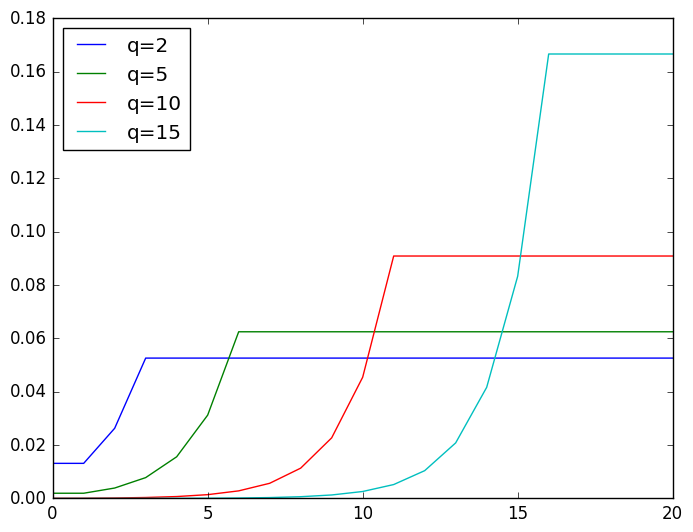

PyObject <matplotlib.legend.Legend object at 0x324ad4518>

In [7]:
# plot distributions
using PyPlot

iter=1
x = collect(0:Q)
fig, ax = subplots()
for q in qs
    y = squeeze(Dist[iter,:],1)
    ax[:plot](x, y, label="q=$q")
    iter+=1
end
ax[:legend](loc="upper left")

Every state above $q \; \text{i.e.} \; x \geq q+1$ has the same probability in the stationary distribution. The ones below have less likely to happen. This is because in the stationary distribution, conditioning on not restocking, all of the states (above x) are as likely as the others. In order to go below $q$, a high demand is needed. The higher the demand needed, the less likely is to occur, so in the stationary distribution the lower states are less likely.